In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import mu2

import helium4plusplus as he4

In [6]:
rg_flow = np.loadtxt('datfiles/he4plusplus_LO_nonlocal2_2_6_6_rg_flow.txt')
# rg_flow_nlo = np.loadtxt('datfiles/rg-flow-semilocal-1.dat')
rg_flow_nlop = np.array([
    [2.61078125,         9.304492273278823,   2.2782722500000006],
    [2.468375,           18.185864919197975,  3.6006400000000007],
    [2.3407004310344828, 29.89421313399494,   4.5007],
    # [2.2255840163934426, 47.396177,           11.724],
    [2.2255840163934426, 33.3964630960004, -3674.9983875000125],
    [2.121259765625,     72.90576532417822,   8.580714000000016],
    [2.0262779850746266, 120.91656424681318,  8.715709500000015],
    [1.9394375,          256.425007,          13.046],
    [1.859734589041096,  8799.627904302775,   348.97740071154726],
    [1.718488924050633,  -323.0475200349644,  587.0788357323152],
    [1.6556173780487806, -150.47377102058104, 246.57059130498635],
    [1.5971838235294118, -94.19534391313341,  149.16368330911777],
    [1.5427343749999998, -64.32496554957861,  105.87781380002716],
    [1.491875,           -31.023721449725826, 0.03899996833333333]
])

In [7]:
# systems_lo = [he4.NonlocalHelium4System2(R, 0, 2, 6, 6) for R in rg_flow[:, 0]]
systems_nlo = [he4.NonlocalHelium4System2(R, 0, 2, 6, 6) for R in rg_flow_nlop[:, 0]]

In [14]:
def perturbative_spectrum(sys, glo, gnlo):
    evals, evecs = mu2.bind.bound_states(
        sys.v_tilde, sys.interaction.counterterm.gen(1, 0), glo, sys.q, sys.wq, sys.mu
    )
    
    energies = []
    for i in range(evals.size):
        elo = evals[i]
        phi = evecs[:, i]

        # normalize the wave function
        N = np.dot(sys.wq, sys.q**2 * phi**2)
        phi_norm = phi/np.sqrt(N)

        x = sys.wq * sys.q**2 * phi_norm
        vnlo = sys.interaction.counterterm.gen(0, gnlo)
        energies.append(elo + x @ (vnlo @ x))
    
    return energies

In [15]:
index = 3
sys = systems_nlo[index]
glo, gnlo = rg_flow_nlop[index, 1:]
sys.bound_state_spectrum(*rg_flow_nlop[index, 1:]), perturbative_spectrum(sys, glo, gnlo)

(array([-291.82429097]), [0.3110271774171499])

In [107]:
e2s_lo = np.array([])
spurious_states = []

for (sys, (R, glo)) in zip(systems_lo, rg_flow):
    
    evals, evecs = mu2.bind.bound_states(
        sys.v_tilde, sys.interaction.counterterm.gen(1, 0), glo, sys.q, sys.wq, sys.mu
    )
    print(evals)
    
    elo = evals[-1]

    e2s_lo = np.append(e2s_lo, elo)

    if evals.size > 1:
        spurious_states.append([R, evals[-2]])
#     phi = evecs[:, -1]

#     # normalize the wave function
#     N = np.dot(sys.wq, sys.q**2 * phi**2)
#     phi_norm = phi/np.sqrt(N)

#     x = sys.wq * sys.q**2 * phi_norm
#     vnlo = sys.interaction.counterterm.gen(0, gnlo)

#     print(elo, x @ (vnlo @ x), elo + x @ (vnlo @ x))
    
#      + x @ (vnlo @ x))

[-0.00129761]
[-0.00130227]
[-0.00130635]
[-0.00130967]
[-0.00131212]
[-0.0013137]
[-0.00131451]
[-0.00131468]
[-0.00131438]
[-9.88023019e+01 -1.31379017e-03]
[-5.54905640e+01 -1.31305557e-03]
[-4.42129841e+01 -1.31230848e-03]
[-4.04055948e+01 -1.31164234e-03]
[-3.97435225e+01 -1.31111658e-03]
[-4.08903974e+01 -1.31076033e-03]
[-4.33226120e+01 -1.31057798e-03]
[-4.68122338e+01 -1.31055546e-03]
[-5.12583961e+01 -1.31066636e-03]
[-5.66192121e+01 -1.31087744e-03]
[-6.28785334e+01 -1.31115317e-03]
[-7.00257557e+01 -1.31145929e-03]
[-7.80398589e+01 -1.31176534e-03]
[-8.68731386e+01 -1.31204636e-03]
[-9.64313829e+01 -1.31228369e-03]
[-1.06547320e+02 -1.31246513e-03]
[-1.16943755e+02 -1.31258464e-03]
[-1.27182915e+02 -1.31264160e-03]
[-1.36601867e+02 -1.31263982e-03]
[-1.44248944e+02 -1.31258650e-03]
[-1.48883670e+02 -1.31249111e-03]
[-1.49208798e+02 -1.31236437e-03]
[-1.44575075e+02 -1.31221734e-03]
[-1.35934423e+02 -1.31206059e-03]
[-1.25742856e+02 -1.31190373e-03]
[-2.55982965e+03 -1.16355

In [8]:
e2s = np.array([])

for (sys, (R, glo, gnlo)) in zip(systems_nlo, rg_flow_nlop):
        
    evals, evecs = mu2.bind.bound_states(
        sys.v_tilde, sys.interaction.counterterm.gen(1, 0), glo, sys.q, sys.wq, sys.mu
    )
    print(evals)
    
    elo = evals[-1]
    phi = evecs[:, -1]

    # normalize the wave function
    N = np.dot(sys.wq, sys.q**2 * phi**2)
    phi_norm = phi/np.sqrt(N)

    x = sys.wq * sys.q**2 * phi_norm
    vnlo = sys.interaction.counterterm.gen(0, gnlo)

    print(R, elo, x @ (vnlo @ x), elo + x @ (vnlo @ x))
    
    e2s = np.append(e2s, elo + x @ (vnlo @ x))

[-0.00172923]
2.61078125 -0.0017292306782865604 0.0005068744105926858 -0.0012223562676938746
[-0.00159753]
2.468375 -0.0015975284002884055 0.0003279984752716773 -0.0012695299250167283
[-0.00119683]
2.3407004310344828 -0.0011968329035177102 -0.00010752400042623382 -0.001304356903943944
[-0.03592191]
2.2255840163934426 -0.03592191103481055 0.3469490884519605 0.3110271774171499
[-0.00032319]
2.121259765625 -0.0003231902952760125 -0.0006627118358833264 -0.000985902131159339
[-0.00032355]
2.0262779850746266 -0.00032354981578907016 -0.000664124388253236 -0.000987674204042306
[-0.00032362]
1.9394375 -0.0003236203468605145 -0.0006644130341774792 -0.0009880333810379936
[-0.00032346]
1.859734589041096 -0.00032345547263712963 -0.0006637586514920841 -0.0009872141241292138
[-1.11504684e+02 -4.84077792e-02]
1.718488924050633 -0.04840777922566195 0.48547663998474533 0.43706886075908336
[-6.40307844e+01 -4.80650472e-02]
1.6556173780487806 -0.04806504724812374 0.48019824339424844 0.43213319614612467
[-

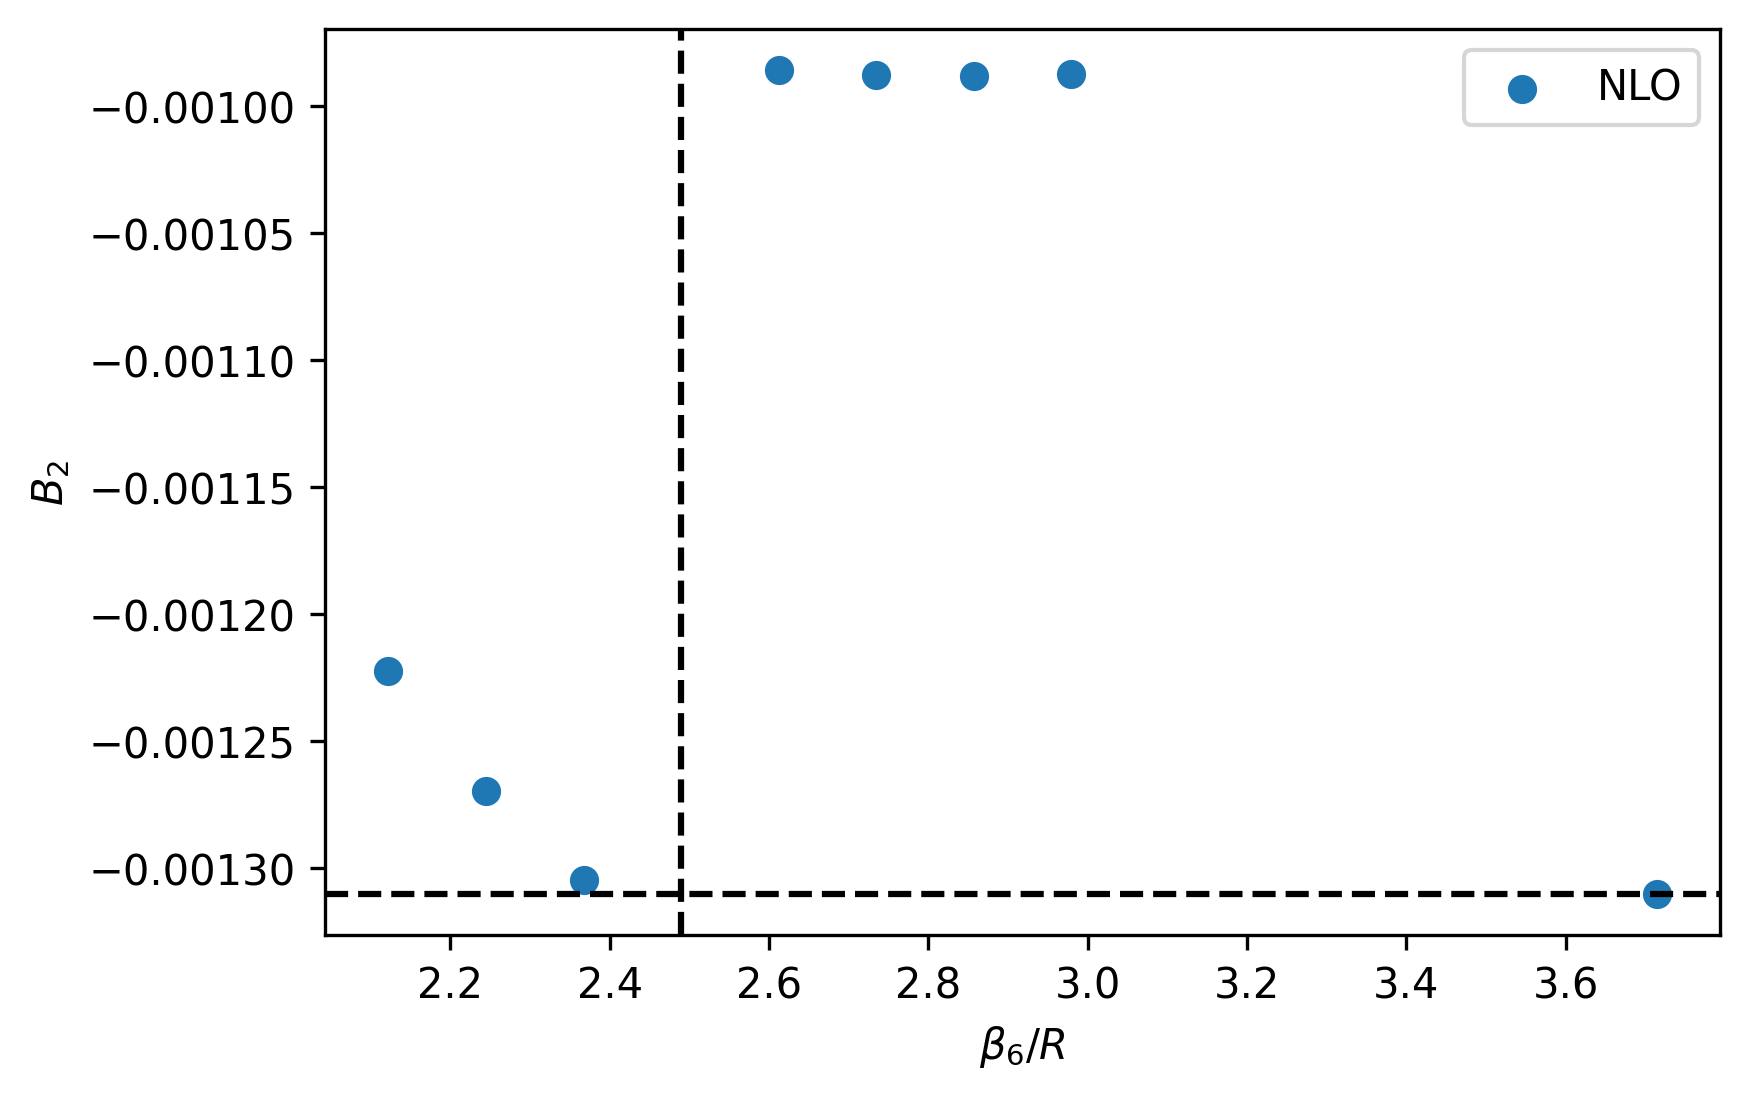

In [12]:
ii = np.where(e2s < 0)[0]

fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

# ax.scatter(he4.BETA6/rg_flow[:, 0], e2s_lo, label='LO')
ax.scatter(he4.BETA6/rg_flow_nlop[ii, 0], e2s[ii], label='NLO')
ax.axvline(he4.BETA6/rg_flow_nlop[3, 0], color='k', linestyle='--')
ax.axhline(-1.31e-3, color='k', linestyle='--')

ax.legend()
ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$');

In [78]:
# glo, gnlo = [9.304492273278823, 2.2782722500000006]
glo, gnlo = [-31.023721449725826, 0.03899996833333333]

# LO only


# nonperturbative calculation
e2, _ = mu2.bind.bound_states(
    sys.v_tilde, sys.interaction.counterterm.gen(glo, gnlo), 1, sys.q, sys.wq, sys.mu
)

In [80]:
evals, e2

(array([-4.09067091e+01, -1.35116341e-03]),
 array([-4.0899876e+01, -1.3103455e-03]))

$$
E_2^{({\rm NLO})} = E_2^{({\rm LO})} + \langle \phi^{({\rm LO})} | V_{\rm NLO} | \phi^{({\rm LO})} \rangle
$$

The shift term becomes

$$
\langle \phi^{({\rm LO})} | V_{\rm NLO} | \phi^{({\rm LO})} \rangle = \int_0^\infty dpp^2 dkk^2 \phi(p) V_{\rm NLO}(p,k) \phi(k)~.
$$

The integrals are approximated with summations

$$
\int_0^\infty dpp^2 dkk^2 \phi(p) V_{\rm NLO}(p,k) \phi(k) \approx \sum_{i,j} w_ip_i^2 w_jk_j^2 \phi_i V_{ij} \phi_k
$$

Define

$$
\vec{x} \equiv w_i p_i^2 \phi_i~,
$$

and

$$
V_{\rm NLO}(p, k) \rightarrow V_{ij} \equiv \mathbf{V}
$$

and we have

$$
E_2^{({\rm NLO})} = E_2^{({\rm LO})} + \vec{x}^T \mathbf{V} \vec{x}
$$

In [81]:
for j in range(evals.size):
    elo = evals[j]
    phi = evecs[:, j]
    
    # normalize the wave function
    N = np.dot(sys.wq, sys.q**2 * phi**2)
    phi_norm = phi/np.sqrt(N)
    
    x = sys.wq * sys.q**2 * phi_norm
    vnlo = sys.interaction.counterterm.gen(0, gnlo)
    
    print(elo, x @ (vnlo @ x), elo + x @ (vnlo @ x))

-40.90670905884147 0.006833601857409115 -40.89987545698406
-0.0013511634053109218 4.113144118697529e-05 -0.0013100319641239466
